In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:

df = pd.read_csv('../../data/2019-11-01-ASR-internal_14142.csv')
df.head(5)

,filename,LCD,PLD,LFPD,cm3_g,ASA_m2_cm3,ASA_m2_g,NASA_m2_cm3,NASA_m2_g,AV_VF,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,ABAVIJ_clean,4.45543,2.49720,4.40652,1.524930,0.00,0.000,312.052,204.6330,0.3792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABAVOP_clean,3.53642,2.44162,3.53007,1.565940,0.00,0.000,122.782,78.4079,0.3782,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABAYIO_clean,11.39486,4.32260,11.27409,0.949126,1428.73,1505.310,409.494,431.4440,0.6636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABAYOU_clean,11.27344,4.51080,11.27344,0.979267,1463.42,1494.400,419.062,427.9350,0.6638,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABEFUL_clean,4.93969,3.32948,4.93889,1.551080,418.49,269.806,0.000,0.0000,0.4118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Drop columns that start with "Unnamed"
df = df.loc[:, ~df.columns.str.startswith('Unnamed')]

# Drop metadata columns
metadata_columns = [
    "Extension",
    "FSR_overlap",
    "from_CSD",
    "public",
    "DISORDER",
    "CSD_overlap_inCoRE",
    "CSD_of_WoS_inCoRE",
    "CSD_overlap_inCCDC",
    "date_CSD",
    "DOI_public",
    "Note",
    "Matched_CSD_of_CoRE",
    "Possible_List_CSD_of_CoRE",
    "Has_OMS"
]

df = df.drop(columns=metadata_columns)

# Display the first 5 rows of the modified DataFrame
df.head(5)

,filename,LCD,PLD,LFPD,cm3_g,ASA_m2_cm3,ASA_m2_g,NASA_m2_cm3,NASA_m2_g,AV_VF,AV_cm3_g,NAV_cm3_g,All_Metals,Open_Metal_Sites
0,ABAVIJ_clean,4.45543,2.49720,4.40652,1.524930,0.00,0.000,312.052,204.6330,0.3792,0.248667,0.0,Co,
1,ABAVOP_clean,3.53642,2.44162,3.53007,1.565940,0.00,0.000,122.782,78.4079,0.3782,0.241516,0.0,Co,
2,ABAYIO_clean,11.39486,4.32260,11.27409,0.949126,1428.73,1505.310,409.494,431.4440,0.6636,0.699170,0.0,Mn,
3,ABAYOU_clean,11.27344,4.51080,11.27344,0.979267,1463.42,1494.400,419.062,427.9350,0.6638,0.677854,0.0,Co,
4,ABEFUL_clean,4.93969,3.32948,4.93889,1.551080,418.49,269.806,0.000,0.0000,0.4118,0.265493,0.0,Tb,


In [26]:
df_numeric = df[['LCD', 'PLD', 'LFPD', 'cm3_g', 'ASA_m2_cm3', 'NASA_m2_cm3', 'AV_VF', 'AV_cm3_g', 'NAV_cm3_g']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

In [27]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [28]:
# Check the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each principal component
print(f'Explained variance ratio of each component: {explained_variance_ratio}')

# Total variance explained by the selected components
total_explained_variance = explained_variance_ratio.sum()
print(f'Total explained variance by the selected components: {total_explained_variance}')


Explained variance ratio of each component: [0.57771065 0.1328186 ]
Total explained variance by the selected components: 0.7105292502305112


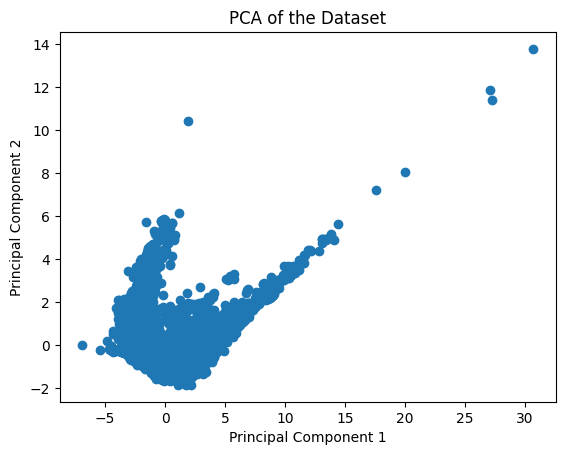

In [29]:
# Step 4: Plot the PCA result
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('PCA of the Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [10]:
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])

# Create an interactive 3D scatter plot
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3',
                    title="3D PCA Interactive Plot",
                    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
                    opacity=0.7)

# Show the plot
fig.show()

ValueError: Shape of passed values is (14142, 2), indices imply (14142, 3)

/home/markus/mof_project/project/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/markus/mof_project/project/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/markus/mof_project/project/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/markus/mof_project/project/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/markus/mof_project/project/lib/pyt

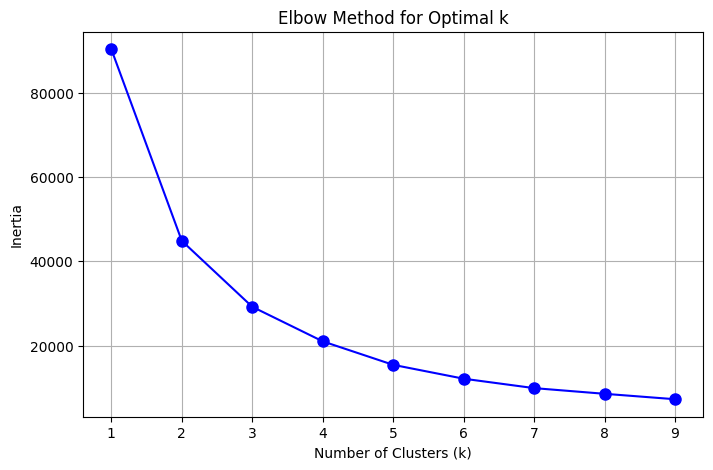

/home/markus/mof_project/project/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



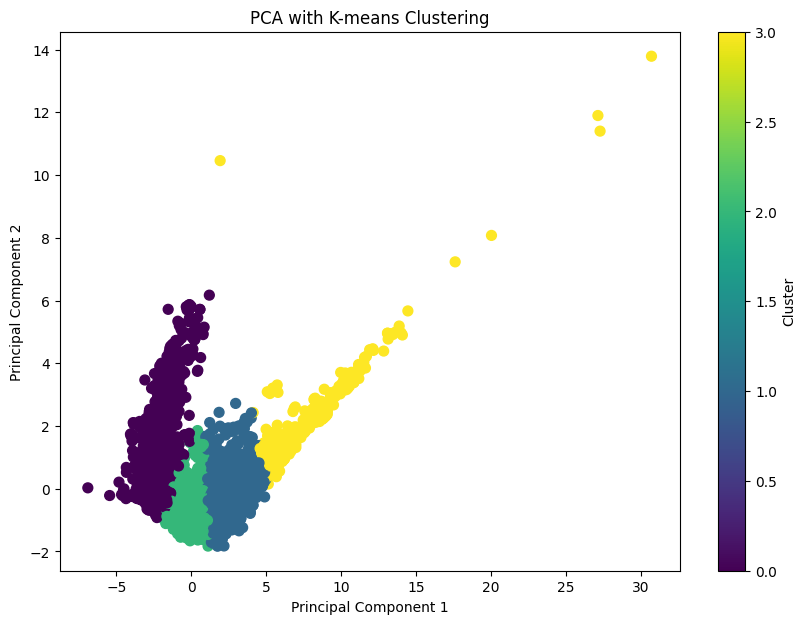

In [30]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Assuming pca_df is your DataFrame containing PCA-transformed data
X = pca_df[['PC1', 'PC2']]  # Use PC1 and PC2 for 2D clustering

# Step 1: Elbow Method to find optimal number of clusters
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-', markersize=8)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Step 3: Apply K-means with a chosen number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=4, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(X)

# Step 4: Plot PCA with cluster assignments
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', s=50)
plt.title('PCA with K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [43]:
labels = kmeans.labels_
df_numeric["cluster"] = labels
cluster_analysis = df_numeric.groupby('cluster').agg(['mean', 'median', 'std'])
cluster_analysis["NASA_m2_cm3"]


/tmp/ipykernel_79552/2272517742.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,mean,median,std
cluster,,,
0,355.276448,253.748,371.819619
1,13.314176,0.000,69.055871
2,9.631717,0.000,50.066154
3,9.552955,0.000,59.723106


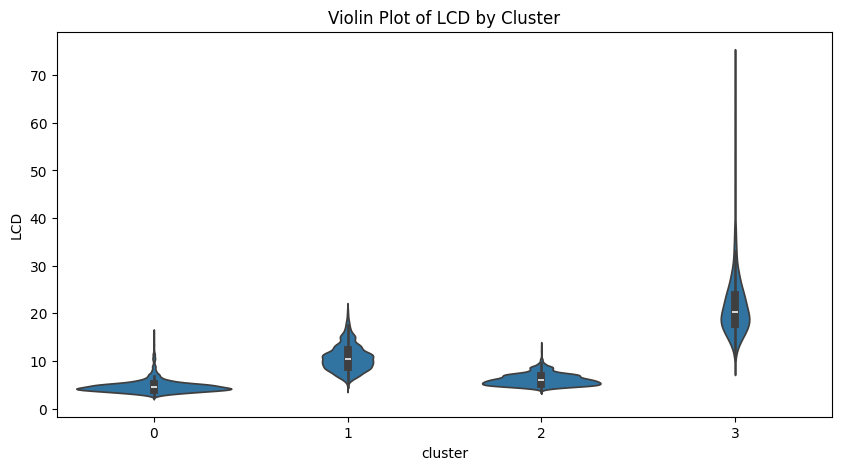

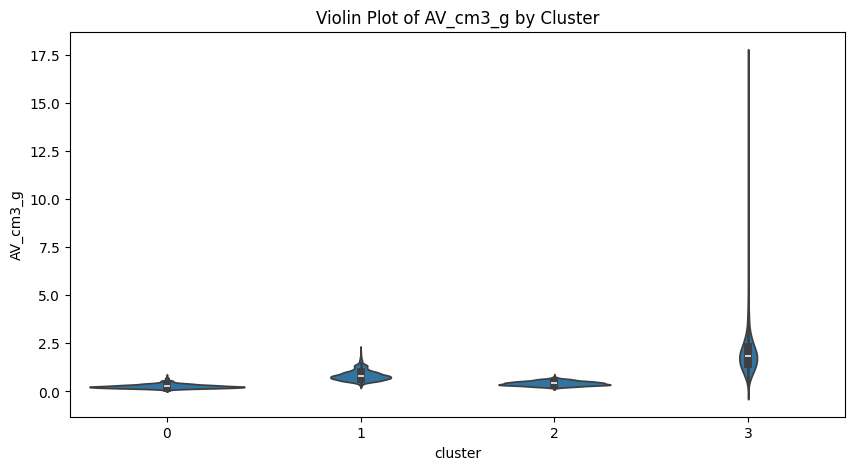

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in ['LCD', 'AV_cm3_g']:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x='cluster', y=feature, data=df_numeric)
    plt.title(f'Violin Plot of {feature} by Cluster')
    plt.show()


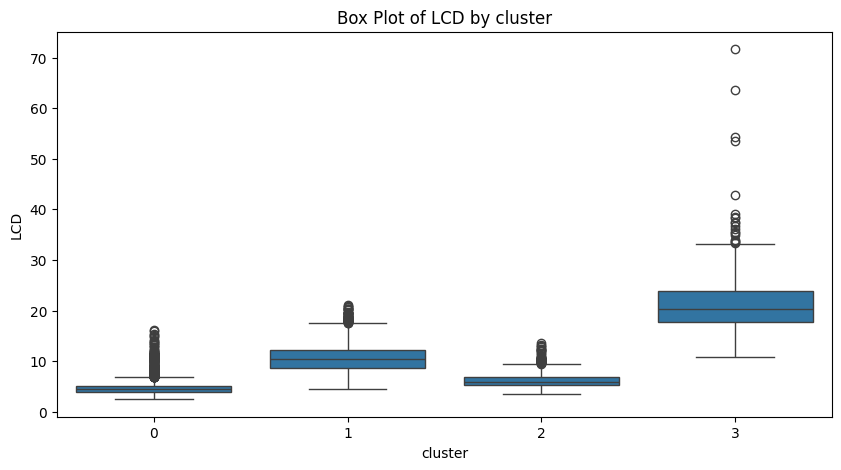

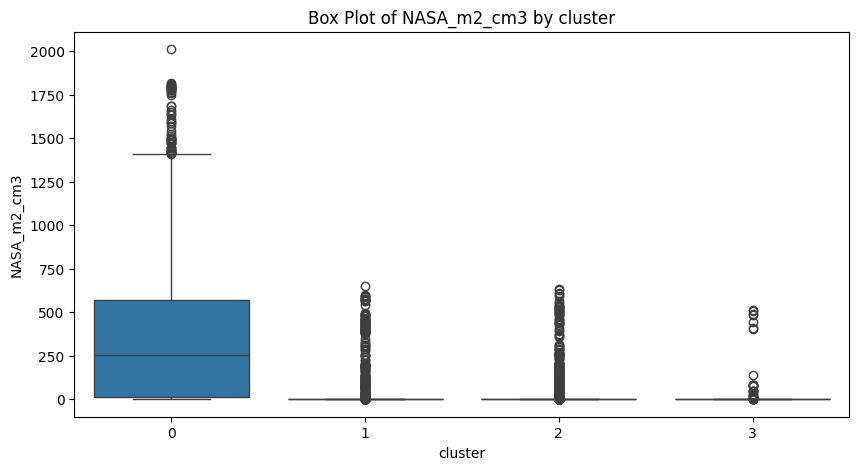

In [35]:


for feature in ['LCD', 'NASA_m2_cm3']:  # Replace with actual feature names
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='cluster', y=feature, data=df_numeric)
    plt.title(f'Box Plot of {feature} by cluster')
    plt.show()


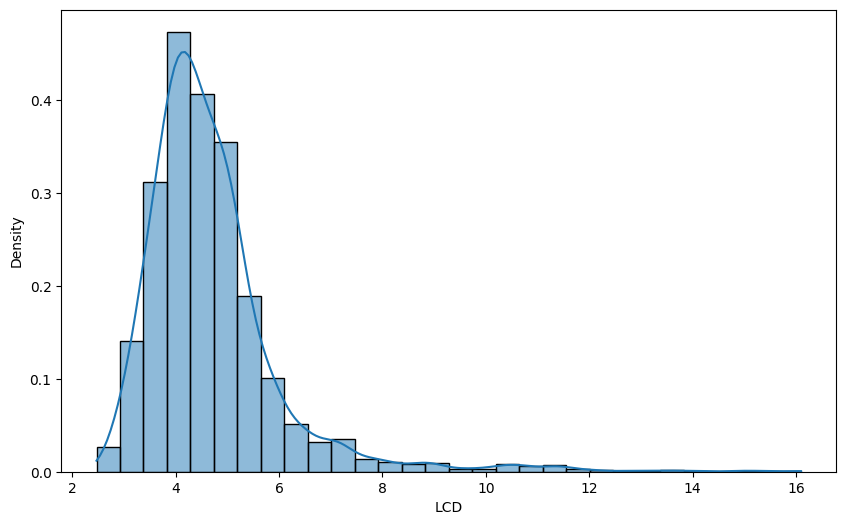

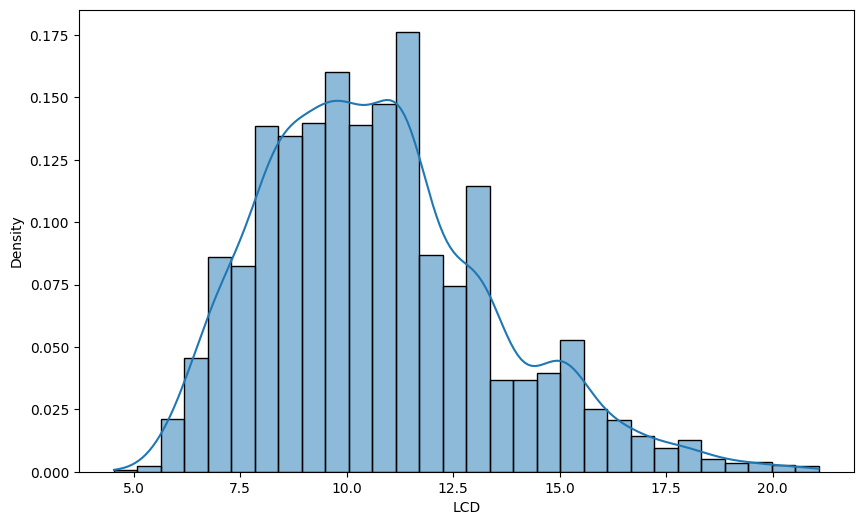

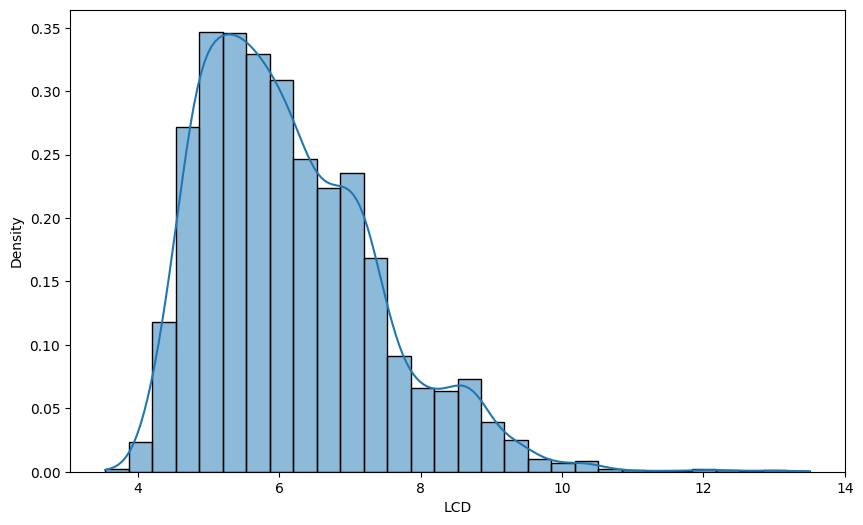

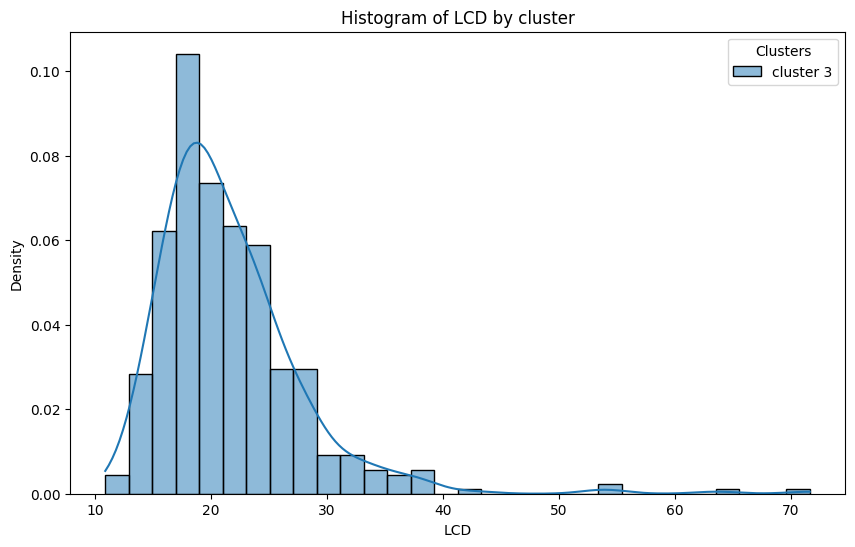

In [47]:
# Assuming `data` is your DataFrame with a 'Cluster' column and features
features = ['LCD']  # Replace with actual feature names

for feature in features:
    for cluster in df_numeric['cluster'].unique():
        plt.figure(figsize=(10, 6))
        sns.histplot(df_numeric[df_numeric['cluster'] == cluster][feature], 
                     bins=30, 
                     kde=True, 
                     label=f'cluster {cluster}', 
                     stat='density', 
                     common_norm=False)
    
    plt.title(f'Histogram of {feature} by cluster')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(title='Clusters')
    plt.show()


In [49]:
# Filter out rows where 'LCD' is greater than 70
filtered_df = df[df['LCD'] >= 70]
filtered_df

,filename,LCD,PLD,LFPD,cm3_g,ASA_m2_cm3,ASA_m2_g,NASA_m2_cm3,NASA_m2_g,AV_VF,AV_cm3_g,NAV_cm3_g,All_Metals,Open_Metal_Sites,cluster
8100,RAVXOD_clean,71.64119,71.50197,71.64119,0.179103,619.991,3461.66,0.0,0.0,0.8986,5.01724,0.0,Mg,Mg,3
